In [1]:
include("../yaoimport.jl");

# create a maximally entangled Bell state

In [2]:
Φcircuit = chain(2, 
    put(1=>H), 
    control(1, 2=>X)
)
Φ = zero_state(2) |> Φcircuit
state(Φ)

4×1 Matrix{ComplexF64}:
 0.7071067811865475 + 0.0im
                0.0 + 0.0im
                0.0 + 0.0im
 0.7071067811865475 + 0.0im

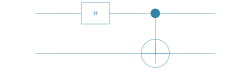

In [3]:
svgplot(Φcircuit)

# define the teleportation circuit

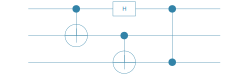

In [4]:
tele = chain(3,
    control(1, 2=>X),
    put(1=>H),
    control(2,3=>X),
    control(1,3=>Z),
)
svgplot(tele)

 total circuit

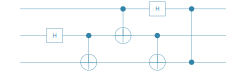

In [5]:
chain(3, put(2:3 => Φcircuit), tele) |> svgplot

# run teleportation

In [6]:
ψ = rand_state(1)
state(ψ)

2×1 Matrix{ComplexF64}:
 0.06792629615178038 + 0.4137280604342298im
 0.03792192079546314 - 0.9070705806185169im

In [7]:
out = join(ψ,Φ) |> tele
state(out)

8×1 Matrix{ComplexF64}:
 0.06792629615178036 + 0.4137280604342297im
                 0.0 + 0.0im
                 0.0 + 0.0im
                 0.0 + 0.0im
 0.03792192079546313 - 0.9070705806185168im
                -0.0 - 0.0im
                 0.0 + 0.0im
                -0.0 - 0.0im

discard qubits 1,2

In [8]:
measure!(RemoveMeasured(), out, 1:2) 
state(out)

2×1 Matrix{ComplexF64}:
 0.06792629615178038 + 0.4137280604342298im
 0.03792192079546314 - 0.907070580618517im